In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("C:/Users/govar/Downloads/train11.csv")

In [3]:
data.head()

,Title,Author,Edition,type,Date,Reviews,Ratings,BookCategory,Synopsis_Polarity_score,Synopsis_subjectivity_score,Price
0,5803,748,13,20,3/10/2016,4.0,8,0,0.208800,0.451340,220.00
1,2120,370,13,20,11/7/2012,3.9,14,2,0.183471,0.522176,202.93
2,2982,4045,13,20,2/25/1982,4.8,6,6,0.191075,0.465767,299.00
3,189,79,13,20,10/5/2017,4.1,13,5,0.100000,0.375000,180.00
4,2853,1138,8,20,10/10/2006,5.0,1,1,0.356250,0.845625,965.62


In [4]:
data.shape

(6237, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        6237 non-null   int64  
 1   Author                       6237 non-null   int64  
 2   Edition                      6237 non-null   int64  
 3   type                         6237 non-null   int64  
 4   Date                         6237 non-null   object 
 5   Reviews                      6237 non-null   float64
 6   Ratings                      6237 non-null   int64  
 7   BookCategory                 6237 non-null   int64  
 8   Synopsis_Polarity_score      6237 non-null   float64
 9   Synopsis_subjectivity_score  6237 non-null   float64
 10  Price                        6237 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 536.1+ KB


In [6]:
data.describe()

,Title,Author,Edition,type,Reviews,Ratings,BookCategory,Synopsis_Polarity_score,Synopsis_subjectivity_score,Price
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,3398.500561,2145.817380,12.304634,18.865961,4.293202,35.984287,4.627385,0.159485,0.503266,560.707516
std,1965.721194,1263.391655,1.781668,3.126167,0.662501,149.995031,3.169320,0.145011,0.130498,690.110657
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,25.000000
25%,1686.000000,1071.000000,13.000000,20.000000,4.000000,2.000000,2.000000,0.076533,0.433160,249.180000
50%,3413.000000,2127.000000,13.000000,20.000000,4.400000,7.000000,5.000000,0.161655,0.507364,373.000000
75%,5097.000000,3236.000000,13.000000,20.000000,4.800000,22.000000,7.000000,0.246296,0.583333,599.000000
max,6785.000000,4371.000000,19.000000,20.000000,5.000000,6090.000000,10.000000,1.000000,1.000000,14100.000000


In [7]:
data.isnull().sum()

Title                          0
Author                         0
Edition                        0
type                           0
Date                           0
Reviews                        0
Ratings                        0
BookCategory                   0
Synopsis_Polarity_score        0
Synopsis_subjectivity_score    0
Price                          0
dtype: int64

In [8]:
duplicate = data.duplicated().sum()

In [9]:
print(f"the number of duplicates is: {duplicate}")

the number of duplicates is: 0


# Univariant analysis

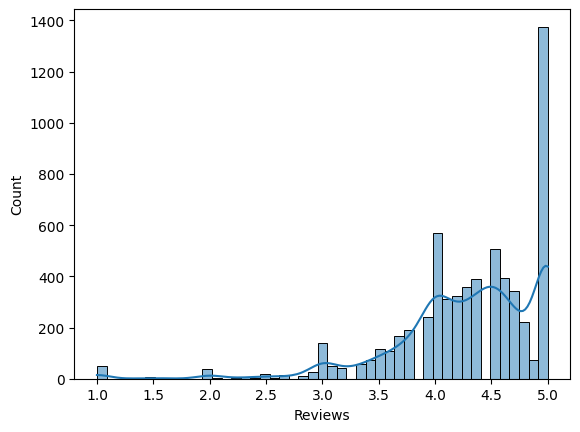

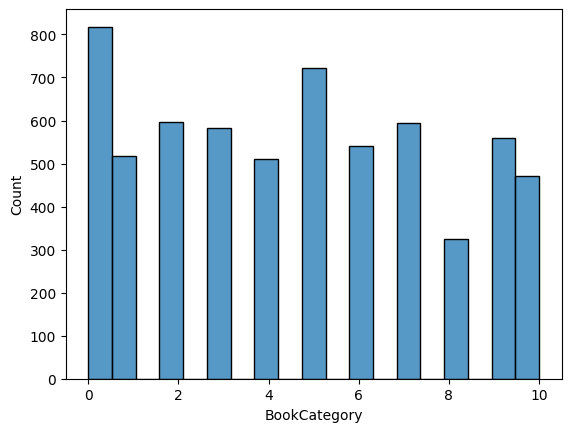

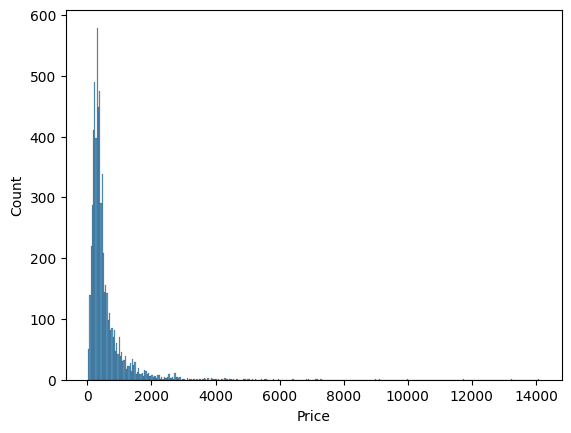

In [10]:
sns.histplot(data['Reviews'], kde=True)
plt.show()

sns.histplot(data['BookCategory'], kde=False)
plt.show()

sns.histplot(data['Price'], kde=False)
plt.show()

# Bivariant analysis

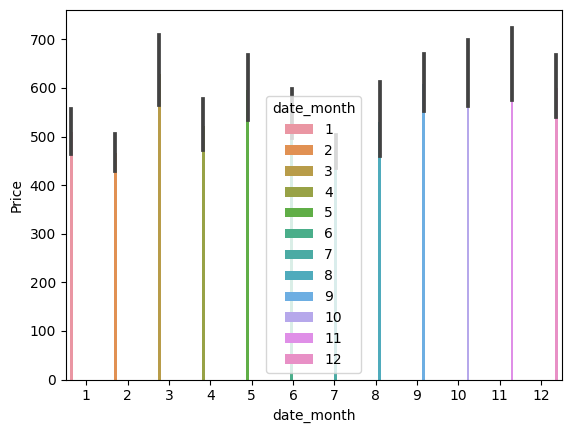

In [40]:
sns.barplot(x='date_month', y='Price', hue='date_month', data=data)
plt.show()



# Multivariant analysis

In [12]:
data1 = data.drop('Date', axis=1)

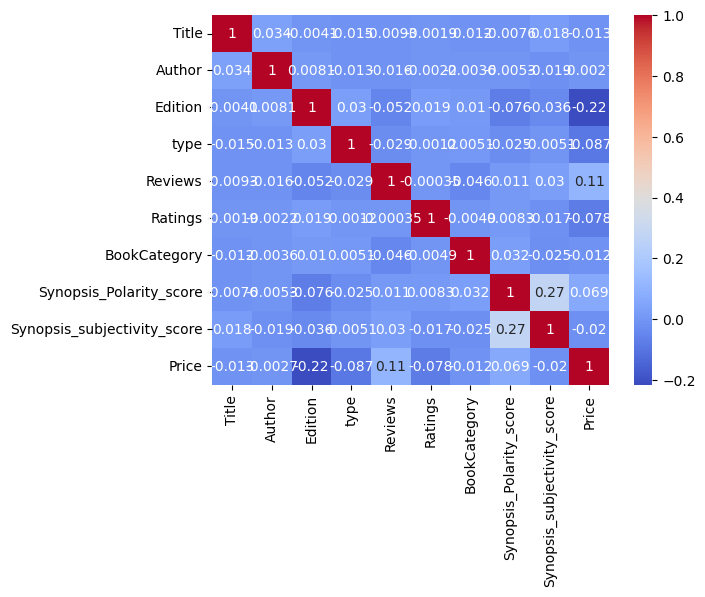

In [13]:
corr = data1.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

# Data preprocessing

# Handling outliers

<Axes: >

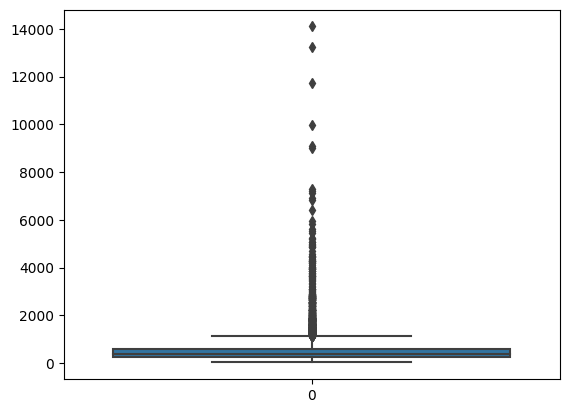

In [14]:
sns.boxplot(data['Price'])

# IQR method

In [15]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3-q1

In [16]:
q1, q3, iqr

(249.18, 599.0, 349.82)

In [17]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit, upper_limit

(-275.55, 1123.73)

In [18]:
data.loc[(data['Price'] > upper_limit) | (data['Price'] < lower_limit)]

,Title,Author,Edition,type,Date,Reviews,Ratings,BookCategory,Synopsis_Polarity_score,Synopsis_subjectivity_score,Price
27,5003,2898,13,4,6/15/2014,4.3,34,3,0.095000,0.363333,3779.0
34,4867,2788,8,20,5/10/2016,4.3,10,3,0.089636,0.599455,1780.0
41,4249,1072,8,20,9/28/2013,4.7,5,5,0.070175,0.571491,1455.9
49,3199,2477,13,20,3/30/2012,4.8,14,1,0.268262,0.417048,1383.0
77,516,1181,13,19,11/1/2007,4.1,5,1,0.411111,0.502778,1643.0
...,...,...,...,...,...,...,...,...,...,...,...
6144,16,3935,13,20,4/14/2011,5.0,4,1,0.243485,0.474811,1821.0
6154,5081,2187,13,20,3/7/2017,5.0,5,6,0.136376,0.395855,1983.0
6190,4722,3461,8,20,6/18/2013,5.0,1,0,0.173636,0.351288,3859.0
6201,5405,981,13,20,9/3/2010,3.8,3,7,0.199020,0.436275,2033.0


In [19]:
new_data = data.loc[(data['Price'] < upper_limit) & (data['Price'] > lower_limit)]
print("Before removing outliers:", len(data))
print("after removing outliers:", len(new_data))
print("outliers:", len(data)-len(new_data))


Before removing outliers: 6237
after removing outliers: 5640
outliers: 597


<Axes: >

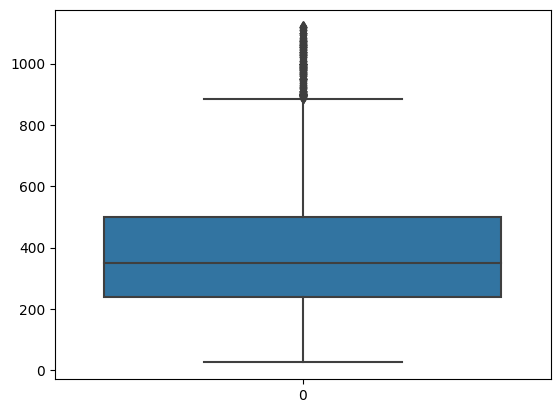

In [20]:
sns.boxplot(new_data['Price'])

Ofter removing outliers

DATE EXTRACTION

In [21]:
data['Date'] = pd.to_datetime(data['Date'])

data['date_month'] = data['Date'].dt.month


In [22]:
data['date_day'] = data['Date'].dt.day
data.head()


,Title,Author,Edition,type,Date,Reviews,Ratings,BookCategory,Synopsis_Polarity_score,Synopsis_subjectivity_score,Price,date_month,date_day
0,5803,748,13,20,2016-03-10,4.0,8,0,0.208800,0.451340,220.00,3,10
1,2120,370,13,20,2012-11-07,3.9,14,2,0.183471,0.522176,202.93,11,7
2,2982,4045,13,20,1982-02-25,4.8,6,6,0.191075,0.465767,299.00,2,25
3,189,79,13,20,2017-10-05,4.1,13,5,0.100000,0.375000,180.00,10,5
4,2853,1138,8,20,2006-10-10,5.0,1,1,0.356250,0.845625,965.62,10,10


In [23]:
data = data.drop('Date', axis=1)
data.head()

,Title,Author,Edition,type,Reviews,Ratings,BookCategory,Synopsis_Polarity_score,Synopsis_subjectivity_score,Price,date_month,date_day
0,5803,748,13,20,4.0,8,0,0.208800,0.451340,220.00,3,10
1,2120,370,13,20,3.9,14,2,0.183471,0.522176,202.93,11,7
2,2982,4045,13,20,4.8,6,6,0.191075,0.465767,299.00,2,25
3,189,79,13,20,4.1,13,5,0.100000,0.375000,180.00,10,5
4,2853,1138,8,20,5.0,1,1,0.356250,0.845625,965.62,10,10


# Fitting a model (Linear Regression)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm 

In [45]:
x = data[['Reviews', 'Ratings', 'Synopsis_subjectivity_score', 'date_month']]
y = data['Price']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=141)

In [47]:
x_train.head()

,Reviews,Ratings,Synopsis_subjectivity_score,date_month
5996,5.0,2,0.433747,3
5547,5.0,1,0.450000,12
4839,4.6,3,0.500000,7
5739,5.0,1,0.417965,10
2859,3.4,6,0.625000,9


In [48]:
x_train.shape

(4178, 4)

In [49]:
x_test.shape

(2059, 4)

In [50]:
y_train.shape

(4178,)

In [51]:
y_test.shape

(2059,)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [53]:
x_train

array([[ 1.06165073, -0.21561443, -0.54113596, -1.07274483],
       [ 1.06165073, -0.2216455 , -0.41710456,  1.63300719],
       [ 0.46303718, -0.20958335, -0.03555033,  0.12981162],
       ...,
       [-0.88384331, -0.14324156, -1.37326127,  1.63300719],
       [ 0.01407702, -0.19149014,  0.17642423,  0.43045074],
       [-0.13557637, -0.0708687 ,  0.82294666,  0.12981162]])

In [54]:
x_test

array([[-0.43488315, -0.18545907, -1.65426522,  0.12981162],
       [-0.58453653, -0.17339692,  0.3888668 ,  0.12981162],
       [-0.13557637, -0.20958335, -1.70485006, -0.4714666 ],
       ...,
       [ 1.06165073, -0.21561443,  0.38731747, -0.77210572],
       [ 1.06165073, -0.2216455 , -0.59920081,  0.12981162],
       [-0.43488315,  1.24390495,  0.93320097, -1.67402305]])

In [55]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = regression.predict(x_test)

In [57]:
from sklearn.metrics import r2_score

In [58]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 611623.5134395679


In [59]:
r2_score(y_test, y_pred)

0.012201522425438482

In [62]:
print("This are the my line coefficients:",regression.coef_)  
print("this is my line intercept:",regression.intercept_)

This are the my line coefficients: [ 81.32523123 -51.69366856 -15.46044393  27.80026499]
this is my line intercept: 547.7674844423168
